# 分析泰坦尼克号数据

## 提出问题

`titanic-data.csv`中包含了泰坦尼克号上2224名乘客和船员中891名的人口学数据和乘客基本信息，包括：

* 是否幸存
* 舱位等级
* 性别
* 年龄
* 同船的亲属或配偶数量
* 同船的父母或子女数量
* 票号
* 票价
* 舱号
* 上船地点

我们想要通过这些数据研究的是：

`各种因素是否会对船上的人员幸存率产生影响？这种影响是提高幸存率还是降低幸存率？`

### 猜想

我们可以先根据常识对一些可能会对幸存率产生影响的因素进行猜想：

* 是否幸存
* **舱位等级**
* **性别**
* **年龄**
* **同船的亲属或配偶数量**
* **同船的父母或子女数量**
* 票号
* 票价
* 舱号
* 上船地点

### 导入原始数据

我们首先用python导入原始数据：

In [1]:
import math
import pandas as pd

%pylab inline

# read data from csv file
titanic_data = pd.read_csv('titanic-data.csv')

def show_survival_ratio_passenger_count_plot(data, column):
    """This function renders the plot showing survival ratio and passenger count against the column.
    """
    # create the grouped DataFrame
    group = data[['Survived', column]].groupby(column)
    
    # render the bar chart of survival ratio
    fig, ax1 = plt.subplots()
    group['Survived'].mean().plot(kind='bar', alpha=0.6, ax=ax1)
    ax1.set_ylabel('Survival Ratio')
    
    # render the line chart of passenger count
    ax2 = ax1.twinx()
    group.size().plot(ax=ax2, label='Passenger Count', use_index=False)
    ax2.set_ylabel('Passenger Count')
    ax2.legend(loc='upper right')
    
    # set the title of the plot
    plt.title('Survival Ratio & Passenger Count of %s' % column)

Populating the interactive namespace from numpy and matplotlib


### 年龄对幸存率的影响：

我们首先来研究年龄对幸存率的影响，我们将年龄划分为几个区间：

* 0至10岁
* 10岁至20岁
* 20岁至35岁
* 35岁至60岁
* 60岁以上

然后我们利用pandas计算这些年龄区间的幸存率，并绘制成柱状图。

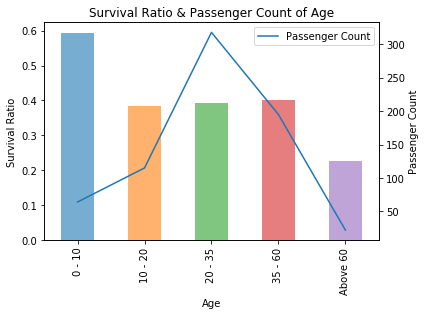

In [2]:
# only need to columns for this analysis and drop data of which age is invalid
survived_by_age = titanic_data[['Survived', 'Age']].dropna(subset=['Age'])
# divide age into groups
bins = [0, 10, 20, 35, 60, 100]
labels = ['0 - 10', '10 - 20', '20 - 35', '35 - 60', 'Above 60']
survived_by_age['Age'] = pd.cut(survived_by_age['Age'], bins=bins, labels=labels)
# render the plot of Age
show_survival_ratio_passenger_count_plot(survived_by_age, 'Age')

从以上图表我们可以明显的看出，年龄小于10岁的儿童的幸存率是最高的，同时年龄大于60岁的老人幸存率是最低的。

这个结果较为符合常人的直觉，孩子在遇到灾难时是被优先照顾的群体，所以很可能幸存率会比较高，而老人由于年龄造成的健康状况的下降，在这种时候很可能无法成功的存活下来。

但我们同时也要注意，老年乘客的数量本身较小，所以我们也需要谨慎的对待这个结论，同时和其他的因素（比如舱位等级，亲属数量等）综合考察这里的幸存率。

### 性别读幸存率的影响

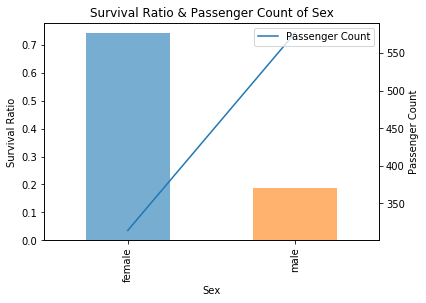

In [3]:
# render the plot of Sex
show_survival_ratio_passenger_count_plot(titanic_data, 'Sex')

从以上图我们可以看出，女性的幸存率要远远高于男性。我们可以认为作为弱势群体被优先照顾的女性在遇到灾难时的确会有较高的幸存率。

但同时我们需要关注到，女性乘客的数量远远少于男性乘客。使得我们同样需要结合别的因素来综合考察这里的幸存率。

### 舱位等级对幸存率的影响

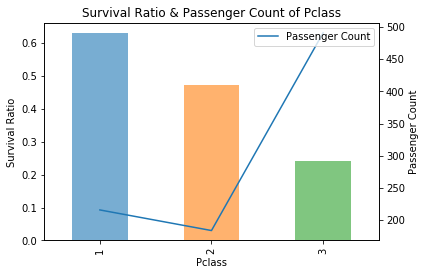

In [4]:
# render the plot of Pclass
show_survival_ratio_passenger_count_plot(titanic_data, 'Pclass')

从以上图看出，从一等舱到三等舱可以看出一个很明显的下降趋势。我们可以认为舱位越高，幸存率越高。

#### 引申：

为了更好的探究舱位等级对幸存率的影响，我们进一步分析对应的乘客比率。

在泰坦尼克号上不同舱位乘客的占比：

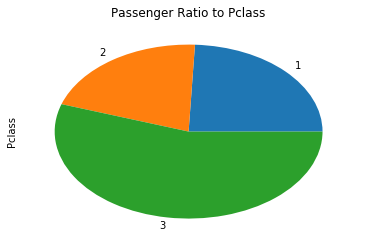

In [5]:
titanic_data.groupby('Pclass').size().plot(kind='pie', title="Passenger Ratio to Pclass", label="Pclass")

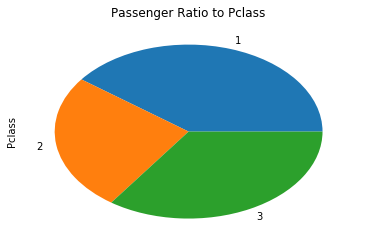

In [6]:
titanic_data[titanic_data['Survived'] == 1].groupby('Pclass').size().plot(kind='pie', title="Passenger Ratio to Pclass", label="Pclass")

通过以上两张图我们可以看出，尽管三等舱的乘客是最多的，但是在幸存者当中，三等舱的乘客却不是最多的，最多的却是乘客占比并不多的一等舱。

这就更好的证明了我们之前得出的舱位越高，幸存率越高的结论。

### 同船的亲属或配偶数量对幸存率的影响

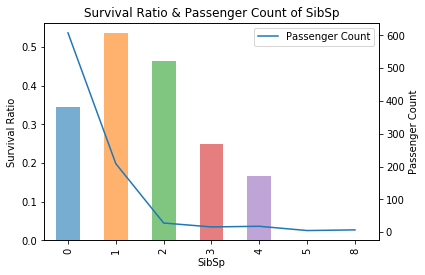

In [7]:
# render the plot of SibSp
show_survival_ratio_passenger_count_plot(titanic_data, 'SibSp')

从上图我们看不出有什么规律。我们可以认为同船的亲属或配偶数量对幸存率没有太多的影响。

### 同船的父母或子女数量对幸存率的影响

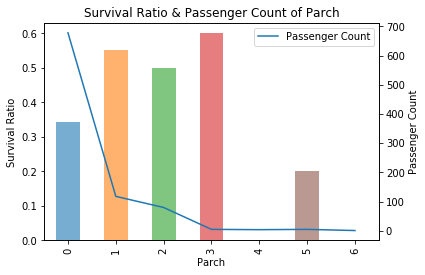

In [8]:
# render the plot of Parch
show_survival_ratio_passenger_count_plot(titanic_data, 'Parch')

从上图我们看不出有什么规律。我们可以认为同船的父母或子女数量对幸存率没有太多的影响。

### 结论

虽然这份泰坦尼克号的幸存者数据量有限，并且也不能代表所有类似的灾难事件，但通过以上的分析，并且结合一些人们的常识判断，我们仍然可以得出某些因素确实和幸存率之间存在一定的联系。

* 年龄小(<10)的儿童幸存率较高
* 舱位越高(票价越贵)幸存率越高

同时有一些不太严谨的因素：

* 年龄大(>60)的老人幸存率较低
* 女性的幸存率较男性高

这些因素虽然不是决定幸存率高低的绝对原因，但仍然影响这人们在遭遇灾难时的幸存率。